In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression

In [2]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", 
                 names=['sepal length','sepal width','petal length','petal width','target'])

iris.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
X = iris.drop("target", axis=1).values
y = iris["target"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

Le classi sono stringhe che rappresentano il nome del fiore, codifichiamole in numeri.

In [4]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

Prima di eseguire la LDA o la PCA dobbiamo essere SICURISSIMI che i dati siano su di una scala comune, quindi eseguiamo la standardizzazione del dataset.

In [5]:
ss = StandardScaler()  
X_train = ss.fit_transform(X_train) 
X_test = ss.transform(X_test)

Classificazione con PCA, per ridurre le dimensioni da 4 a 2

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_train = pca.fit_transform(X_train)
pca_test = pca.transform(X_test)

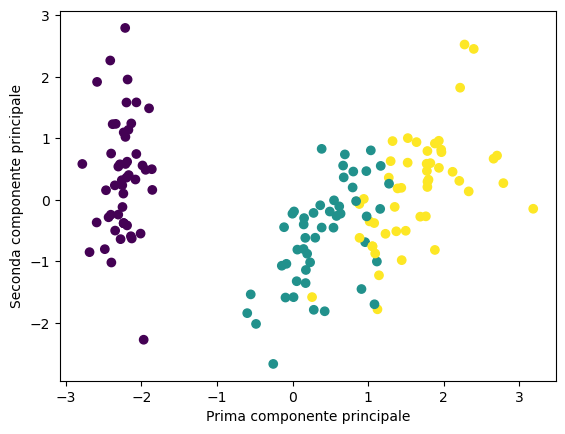

In [7]:
plt.xlabel("Prima componente principale")
plt.ylabel("Seconda componente principale")
plt.scatter(pca_train[:,0], pca_train[:,1], c=y_train)
plt.scatter(pca_test[:,0], pca_test[:,1], c=y_test)
plt.show()

Una classe è nettamente definita mentre due si sovrappongono lievemente, eseguiamo una regressione logistica e osserviamone accuracy e log loss.

In [8]:
lr = LogisticRegression()
lr.fit(pca_train, y_train)

y_pred_train = lr.predict(pca_train)
y_prob_train = lr.predict_proba(pca_train)

y_pred = lr.predict(pca_test)
y_prob = lr.predict_proba(pca_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

loss_train = log_loss(y_train, y_prob_train)
loss_test = log_loss(y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))                #non proprio performance ottime

ACCURACY: TRAIN=0.9167 TEST=0.8667
LOG LOSS: TRAIN=0.2067 TEST=0.2446


Classificazione con LDA

In [9]:
np.unique(y, return_counts=True)                #per vedere se le classi sono bilanciate -> SI (50 esempi ciascuno)

(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object),
 array([50, 50, 50]))

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
lda_train = lda.fit_transform(X_train, y_train)         #si passa anche il target poichè si parla di apprendimento supervisionato
lda_test = lda.transform(X_test)

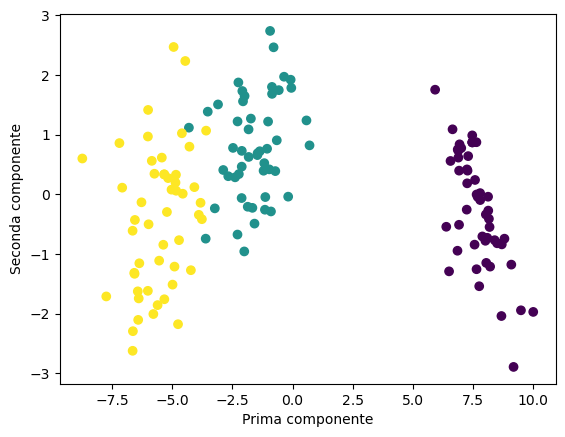

In [11]:
plt.xlabel("Prima componente")
plt.ylabel("Seconda componente")
plt.scatter(lda_train[:,0], lda_train[:,1], c=y_train)
plt.scatter(lda_test[:,0], lda_test[:,1], c=y_test)
plt.show()

Le classi che dopo la PCA erano lievemente sovrapposte adesso lo sono molto meno.

In [12]:
lr = LogisticRegression()
lr.fit(lda_train, y_train)

y_pred_train = lr.predict(lda_train)
y_prob_train = lr.predict_proba(lda_train)

y_pred = lr.predict(lda_test)
y_prob = lr.predict_proba(lda_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

loss_train = log_loss(y_train, y_prob_train)
loss_test = log_loss(y_test, y_prob)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))
print("LOG LOSS: TRAIN=%.4f TEST=%.4f" % (loss_train,loss_test))                #risultati nettamente migliori

ACCURACY: TRAIN=0.9750 TEST=1.0000
LOG LOSS: TRAIN=0.0638 TEST=0.0349


In [14]:
v = [100, 45, 20 , 25, 30]
v = np.array(v)
tmp = np.array([])
tmp = v[:2].copy()
v[:2] = v[-2:]
v[-2:] = tmp

numpy.ndarray